# Atom-Field Interaction In Cavity

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [16]:
from qutip import Qobj, ket, bra, fock, qeye, tensor, create, destroy, sigmaz, basis

In [25]:
from qutip import sesolve

We will study a two-level system interacting with a single mode of the electromagnetic field.

Let's recall Hamiltonian for each system separately:

$\hat{H}_a=\frac{\hbar\omega_a}{2}\left(|exc\rangle\langle exc|-|gnd\rangle\langle gnd|\right)=\frac{\hbar\omega_a}{2}\hat{\sigma_z}$

In [130]:
gnd = basis(2, 0)
exc = basis(2, 1)

sigmaz = exc.proj() - gnd.proj()
sigmaz

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

Single mode of electromagnetic field is equivalent, mathematically, to a harmonic oscillator:

$\hat{H}_m=\hbar\omega_m(\hat{n}+1/2)=\hbar\omega_m(\hat{a}^\dagger\hat{a}+\hat{I}/2)$

The state space of harmonic oscillator is infinite-dimensional (ideally and mathematically), while any real system has finite energy and therefore finite number of actual states participate in a dynamics.
Let's limit ourselves to a certain number of states

In [297]:
d = 15  # approximate a harmonic oscillator with qudit -- a quantum system with d states.

In [298]:
a = destroy(d)
adag = create(d)

In [299]:
# Unit operators for each system
Ia = qeye(2)  # two-level system
Im = qeye(d)  # qudit

In [300]:
Hm = adag * a + Im/2

Interaction will be modeled similarly to two two-level systems: atom emits and mode absorbs and reverse:

$H_{int}=\hat{\sigma}_{+}\otimes\hat{a}+\hat{\sigma}_{-}\otimes\hat{a}^\dagger$

In [301]:
sigmap = exc * gnd.dag()
sigmam = gnd * exc.dag()

In [302]:
hwa = 1.0  # energy of atomic transition
hwm = 1.0  # energy of a single excitation (photon)
epsilon = 0.1  # energy of interaction

In [303]:
# for the modes we have these states (the first three states)
vacuum = basis(d, 0)
single_photon = basis(d, 1)
two_photon = basis(d, 2)

In [304]:
Hatom = hwa / 2 * tensor(sigmaz, Im)
Hmode = hwm * tensor(Ia, Hm)
#Hmode = hwm * tensor(Ia, adag*a)

Hint = epsilon * (tensor(sigmap, a)+tensor(sigmam, adag))

H = Hatom + Hmode + Hint

In [305]:
# Take a look at the numeric representation of the operator in terms of the "composite sytem state" Psi = psi_atom * psi_mode
H

Quantum object: dims=[[2, 15], [2, 15]], shape=(30, 30), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.1         0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          2.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.14142136  0.
   0.          0.

## Vacuum Rabi Oscillations

In [306]:
# intial state = excited state of the atom and the vacuum state of the mode/oscillator
psi0 = tensor(exc, vacuum)
psi1 = tensor(gnd, single_photon)  # state with the atom in the ground state, mode with 1 photon
psi2 = tensor(gnd, two_photon)  # state with the atom in the ground state, mode with 1 photon

P0 = psi0.proj()
P1 = psi1.proj()
P2 = psi2.proj()

In [307]:
tlist = np.linspace(0, 200, 1000)

In [308]:
# track total energy and the population of the excited atoms and
result = sesolve(H, psi0, tlist, [H, P0, P1, P2], options={"store_states": True})

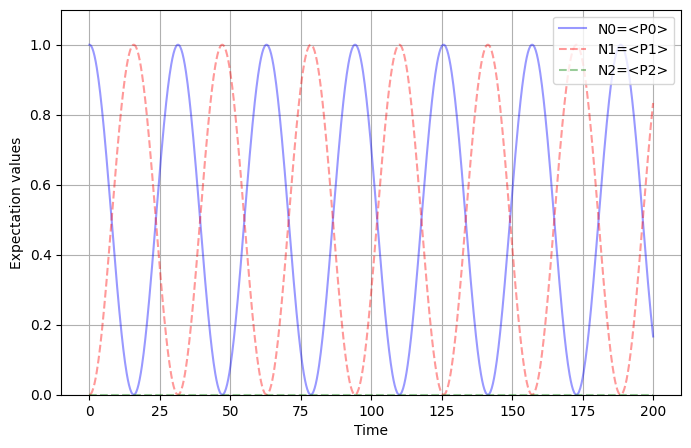

In [309]:
fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, result.expect[1], 'b-', alpha=0.4, label="N0=<P0>")
plt.plot(result.times, result.expect[2], 'r--', alpha=0.4,  label="N1=<P1>")
plt.plot(result.times, result.expect[3], 'g--', alpha=0.4,  label="N2=<P2>")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')

plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.show()
plt.close()

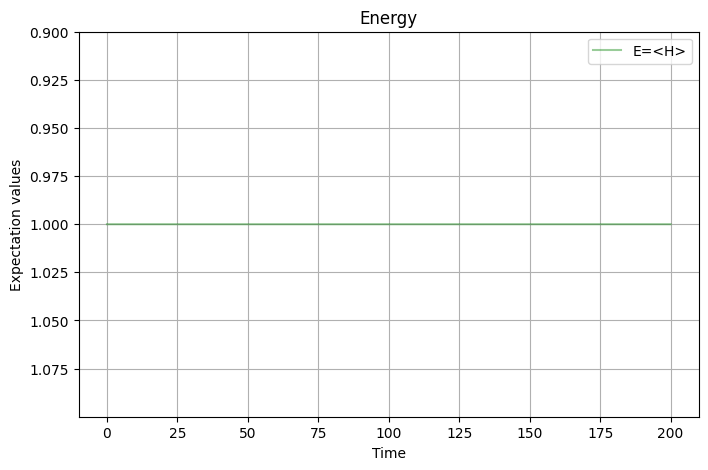

In [310]:
Es = result.expect[0]
Eavg = np.average(Es)
Emin = 1.1 * Eavg
Emax = 0.9 * Eavg

fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, Es, 'g-', alpha=0.4, label="E=<H>")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title("Energy")
plt.legend(loc="upper right")
plt.ylim(Emin, Emax)

plt.show()
plt.close()

## Interaction with Laser Light (Coherent state) -- Revival Phenomena

**Exercise**:

Study the evolution of the population of excited atoms when the initial state of the field is _coherent_ state (laser-induced) with amplitude $\alpha=5$.

In [311]:
from qutip import coherent

In [312]:
#psi_coh = coherent(d, 5)
psi_coh = coherent(d, 13)

In [313]:
epsilon = 0.05
Hint = epsilon * (tensor(sigmap, a)+tensor(sigmam, adag))

H = Hatom + Hmode + Hint

In [314]:
# track total energy and the population of the excited atoms and
Nexc = tensor(exc*exc.dag(), Im)
tlist = np.linspace(0, 800, 1000)
result = sesolve(H, tensor(gnd, psi_coh), tlist, [H, Nexc], options={"store_states": True})

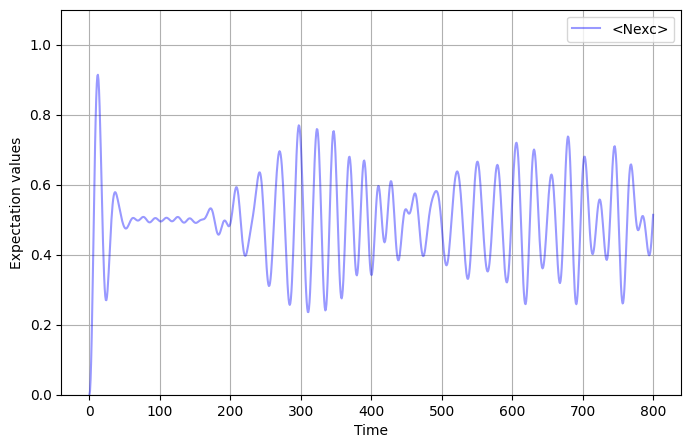

In [315]:
fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, result.expect[1], 'b-', alpha=0.4, label="<Nexc>")
plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')

plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.show()
plt.close()

Check the paper for experimental results:

https://arxiv.org/pdf/1905.05247

**Exercise**:

Study how the choice of d (truncation to limit the states of harmonic oscillator) affects the precision of simulations.